# Basic Example

This example is a basic introduction to using ``pydftools``. It mimics example 1 of ``dftools``.

In [1]:
# Import relevant libraries
%matplotlib inline

import pydftools as df
import time

 # Make figures a little bigger in the notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120 

# For displaying equations
from IPython.display import display, Markdown

Choose some parameters to use throughout

In [2]:
n = 1000
seed = 1234
sigma = 0.5
model =df.model.Schechter()
p_true = model.p0

Generate mock data with observing errors:

In [3]:
data, selection, model, other = df.mockdata(n = n, seed = seed, sigma = sigma, model=model, verbose=True)

Number of sources in the mock survey (expected): 1000.000
Number of sources in the mock survey (selected): 1000


Create a fitting object (the fit is not performed until the ``fit`` object is accessed):

In [4]:
survey = df.DFFit(data=data,  selection=selection, model=model)

Perform the fit and get the best set of parameters:

In [5]:
start = time.time()
print(survey.fit.p_best)
print("Time for fitting: ", time.time() - start, " seconds")

[ -2.04370588  11.12540248  -1.29867552]
Time for fitting:  0.47102880477905273  seconds


Plot the covariances:

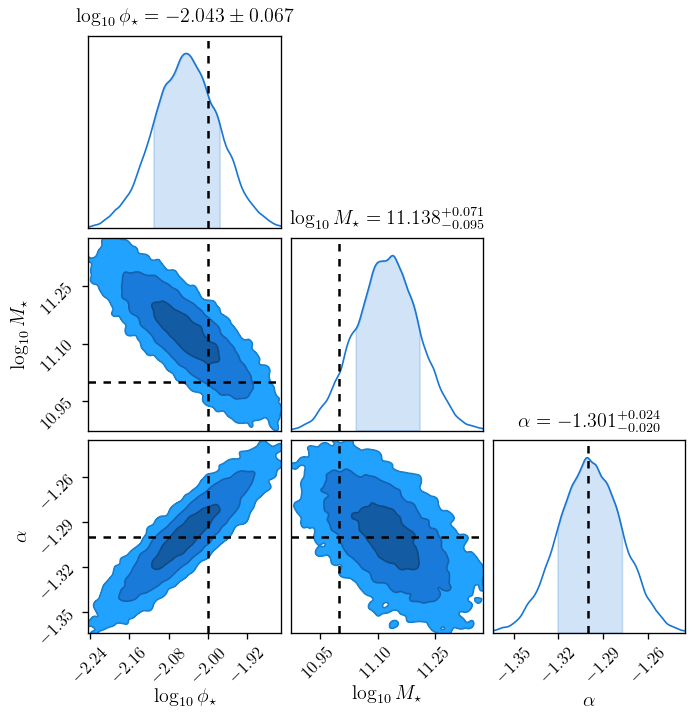

In [6]:
fig = df.plotting.plotcov([survey], p_true=p_true, figsize=1.3)

Plot the mass function itself:

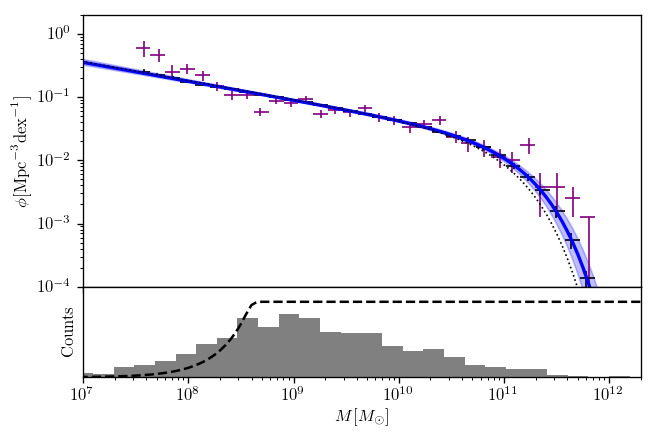

In [7]:
fig, ax = df.mfplot(survey, xlim=(1e7,2e12), ylim=(1e-4,2), p_true = p_true, bin_xmin=7.5, bin_xmax=12)

Write out fitted parameters with (Gaussian) uncertainties:

In [8]:
display(Markdown(survey.fit_summary(format_for_notebook=True)))

$\frac{dN}{dVdx} = \log(10) \phi_\star \mu^{\alpha+1} \exp(-\mu)$, where $\mu = 10^{x - \log_{10} M_\star}$<br><br>$\log_{10} \phi_\star$ =   -2.044 (+-0.066)<br>$\log_{10} M_\star$ =   11.125 (+-0.082)<br>$\alpha$ =   -1.299 (+-0.021)<br>